In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("AmesHousing_1.txt", sep="\t")

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
houses = pd.read_table("AmesHousing_1.txt")
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
def range_col(col):
    max_val = col.max()
    min_val = col.min()
    rang_col = max_val - min_val
    return rang_col

In [5]:
range_col(houses["SalePrice"])

742211

In [6]:
years = houses["Yr Sold"].unique()
years

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

In [7]:
houses[houses["Yr Sold"] == 2006]
year_group = houses.groupby("Yr Sold")

In [8]:
year_group["SalePrice"].get_group(2010)

0      215000
1      105000
2      172000
3      244000
4      189900
        ...  
336    159000
337    136000
338    161000
339    285000
340    231000
Name: SalePrice, Length: 341, dtype: int64

In [9]:
range_by_year = {}

for i in years:
    sale_price = year_group["SalePrice"].get_group(i)
    year_range = range_col(sale_price)
    range_by_year[i] = year_range

In [10]:
dict(sorted(range_by_year.items()))

{2006: 590000, 2007: 715700, 2008: 601900, 2009: 575100, 2010: 598868}

In [11]:
range_by_year = {}

for i in years:
    sale_price = year_group["SalePrice"].get_group(i)
    year_range = sale_price.mean()
    range_by_year[i] = year_range

In [12]:
dict(sorted(range_by_year.items()))

{2006: 181761.648,
 2007: 185138.2074927954,
 2008: 178841.7508038585,
 2009: 181404.56790123458,
 2010: 172597.5982404692}

# The Variance

In [13]:
def varinace(array):
    mean = sum(array)/len(array)
    distances = []
    for element in array:
        distance = (element-mean)**2
        distances.append(distance)
    return sum(distances)/len(distances)

In [14]:
c = [1,3,5,1,3,2,4,6,9,21]

In [15]:
varinace(c)

32.05

# Stand Deviation

In [16]:
def standard_deviation(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append((i-mean)**2)
    average_distance = (np.average(distance))**(1/2) #np.sqrt(np.average(distance))
    return average_distance

In [17]:
standard_deviation(c)

5.661271941887264

In [18]:
sum(c)/len(c)

5.5

In [19]:
5.5 - (5.6*2) , 5.5 + (5.6*2)

(-5.699999999999999, 16.7)

In [20]:
houses["SalePrice"].mean()

180796.0600682594

In [21]:
houses["SalePrice"].mean() - standard_deviation(houses["SalePrice"]), \
houses["SalePrice"].mean() + standard_deviation(houses["SalePrice"])

(100923.00141633686, 260669.11872018193)

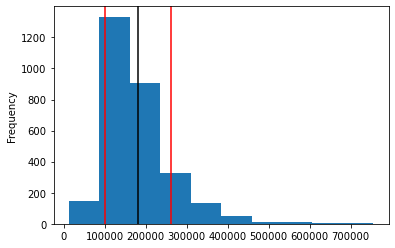

In [22]:
mean = houses["SalePrice"].mean()
st_dv = standard_deviation(houses["SalePrice"]) 

houses["SalePrice"].plot.hist()
plt.axvline(mean, color = "black", label = "Mean")
plt.axvline(mean - st_dv, color = "Red", label = "Below")
plt.axvline(mean + st_dv, color = "Red", label = "Above")

plt.show()

In [23]:
population = houses["SalePrice"]
parameter = standard_deviation(population)
parameter

79873.05865192253

In [24]:
statistic = []

for i in range(5000):
    sample = houses["SalePrice"].sample(10, random_state = i)
    std_dev = standard_deviation(sample)
    statistic.append(std_dev)

In [25]:
len(statistic)

5000

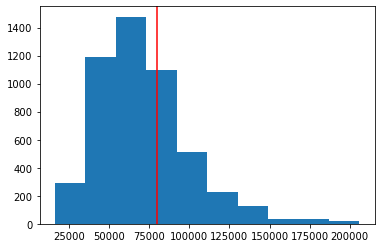

In [26]:
plt.hist(statistic)
plt.axvline(parameter, color = "red")
plt.show()

In [27]:
parameter

79873.05865192253

In [28]:
np.mean(statistic)

71303.64762671606

# Bessel's Correction

In [29]:
def standard_deviation(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append((i-mean)**2)
    average_distance = sum(distance)/(len(distance)-1) #np.sqrt(np.average(distance))
    return np.sqrt(average_distance)

In [30]:
statistic = []

for i in range(5000):
    sample = houses["SalePrice"].sample(10, random_state = i)
    std_dev = standard_deviation(sample)
    statistic.append(std_dev)

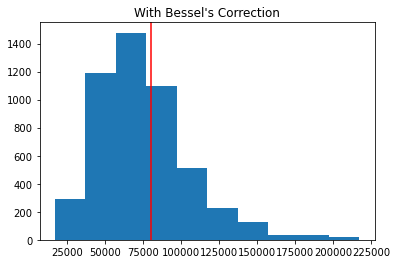

In [31]:
plt.hist(statistic)
plt.axvline(parameter, color = "red")
plt.title("With Bessel's Correction")
plt.show()

In [32]:
parameter

79873.05865192253

In [33]:
np.mean(statistic)

75160.64399282743

# Z-Scores

In [34]:
houses["SalePrice"].sample(1, random_state = 0)

2216    220000
Name: SalePrice, dtype: int64

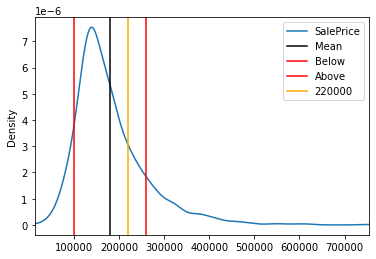

In [35]:
mean = houses["SalePrice"].mean()
st_dv = standard_deviation(houses["SalePrice"]) 

houses["SalePrice"].plot.kde()
plt.xlim(min(houses["SalePrice"]),max(houses["SalePrice"]))
plt.axvline(mean, color = "black", label = "Mean")
plt.axvline(mean - st_dv, color = "Red", label = "Below")
plt.axvline(mean + st_dv, color = "Red", label = "Above")
plt.axvline(220000, color = "orange", label = "220000")
plt.legend()
plt.show()

# Z-Score:
    the value representing the number of std.Deviation away from the mean is commonly known as the standard score, or the z-score

In [43]:
def z_score(value: str ,series, bessel = 0) ->  :
    std = series.std(ddof = bessel)
    mean = series.mean()
    z = (value - mean)/std
    return z

In [44]:
z_score(220000,houses["SalePrice"])

0.4908280788718362

In [38]:
0.4908280788718362*standard_deviation(houses["SalePrice"]) + houses["SalePrice"].mean()

220006.69180510665

website 1 : 3
website 2 : 8

website 1 mean : 3
website 2 mean : 7

website 1 std : 1
website 2 std : 2

website range  : 2-4    = -1  to  1
website 2 std : 5-9     = -1  to  1   


website 1 z-score : 0
website 2 z-score : 0.5


mean : 7
std : 2
5 - 9
value : 8
z-s : 0     = 7
mean+std z: 1       = 9
mean-std z: -1       = 5

In [39]:
(8-7)/2

0.5

In [46]:
!pip install cowsay


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\cowsay.exe' -> 'C:\\Python310\\Scripts\\cowsay.exe.deleteme'

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [50]:
d = {"a":1,"b":2}
d1 = {"d":1,"c":2}
d |  d1

TypeError: unsupported operand type(s) for |: 'dict' and 'dict'